# Czechoslovakia? Or Czech Republik and Slovakia?

## Features
**Population, total**
Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.

**Population growth (annual %)**
Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

**GDP (current US$)**
GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

**GDP per capita (current US$)**
GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

**Inflation, consumer prices (annual %)**
Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

**Primary completion rate, total (% of relevant age group)**
Primary completion rate, or gross intake ratio to the last grade of primary education, is the number of new entrants (enrollments minus repeaters) in the last grade of primary education, regardless of age, divided by the population at the entrance age for the last grade of primary education. Data limitations preclude adjusting for students who drop out during the final year of primary education.

**Wage and salaried workers, total (% of total employment) (modeled ILO estimate)**
Wage and salaried workers (employees) are those workers who hold the type of jobs defined as "paid employment jobs," where the incumbents hold explicit (written or oral) or implicit employment contracts that give them a basic remuneration that is not directly dependent upon the revenue of the unit for which they work.

**Unemployment, total (% of total labor force) (modeled ILO estimate)**
Unemployment refers to the share of the labor force that is without work but available for and seeking employment.

**Unemployment, female/male (% of male labor force) (modeled ILO estimate)**
Unemployment refers to the share of the labor force that is without work but available for and seeking employment.

**Labor force, total**
Labor force comprises people ages 15 and older who supply labor for the production of goods and services during a specified period. It includes people who are currently employed and people who are unemployed but seeking work as well as first-time job-seekers. Not everyone who works is included, however. Unpaid workers, family workers, and students are often omitted, and some countries do not count members of the armed forces. Labor force size tends to vary during the year as seasonal workers enter and leave.

**Researchers in R&D (per million people)**
The number of researchers engaged in Research &Development (R&D), expressed as per million. Researchers are professionals who conduct research and improve or develop concepts, theories, models techniques instrumentation, software of operational methods. R&D covers basic research, applied research, and experimental development.

In [8]:
import requests
import pandas as pd
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt

## Data wrangling
First we need to get the data from the WorldBank API. I am iterating over all the indicator that were of some interest and saving it into one big dataframe.

In [3]:
indicators = ['SP.POP.TOTL', # total population
              'SP.POP.GROW', # population growth
              'NY.GDP.MKTP.CD', # GDP in USD
              'NY.GDP.PCAP.CD', # GDP per capita
              'FP.CPI.TOTL.ZG', # inflation, consumer prices
              'SE.PRM.CMPT.ZS', # primary completion rate
              'SL.EMP.WORK.ZS', # wage and salaried workers 
              'SL.UEM.TOTL.ZS', # unemployment total
              'SL.UEM.TOTL.FE.ZS', # unemployment female
              'SL.UEM.TOTL.MA.ZS', #enmployment male
              'SL.TLF.TOTL.IN', # total labour force
              'SP.POP.SCIE.RD.P6' #researchers in R&D
             ]

parameters = {'format':'json', 'per_page':'1000', 'date':'1993:2020'}
data = pd.DataFrame(columns=['year','country'])
for indicator in tqdm(indicators):
    indicator_list = []
    r = requests.get('http://api.worldbank.org/v2/country/1W;cz;sk/indicator/{}'.format(indicator), params = parameters)
    for entry in tqdm(r.json()[1]):
        tmp_data = {}
        tmp_data['country'] = entry['country']['value']
        tmp_data['year'] = entry['date']
        tmp_data[str(indicator)] = entry['value']
        indicator_list.append(tmp_data)
    data = pd.merge(data, pd.DataFrame(indicator_list), on = ['country','year'], how='outer')

100%|██████████| 12/12 [00:07<00:00,  1.62it/s]


In [4]:
data['year'] = data['year'].astype('int')

In [27]:
with open('cz-sk.pickle', 'wb') as f:
    pickle.dump(data, f)

In [2]:
# Uncomment, if you don't wanna wait for the downloading process
with open('cz-sk.pickle') as f:
    data = pickle.load(f)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [5]:
data.describe()

,SP.POP.TOTL,year,SP.POP.GROW,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,FP.CPI.TOTL.ZG,SE.PRM.CMPT.ZS,SL.EMP.WORK.ZS,SL.UEM.TOTL.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.TLF.TOTL.IN,SP.POP.SCIE.RD.P6
count,7.800000e+01,81.00000,78.000000,7.800000e+01,78.000000,79.000000,74.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,44.000000
mean,2.192211e+09,2006.00000,0.499151,1.757792e+13,11024.680220,4.703953,93.675390,73.429601,8.229391,8.876757,7.721153,9.974782e+08,2305.795056
std,3.129421e+09,7.83741,0.587572,2.748277e+13,5828.204943,4.237934,7.098795,18.505396,4.240310,4.209944,4.320328,1.424717e+09,696.354348
min,5.325305e+06,1993.00000,-0.375720,1.652068e+10,3102.296793,-0.520010,80.225440,44.123248,1.933000,2.384000,1.567000,2.457066e+06,1216.829900
25%,5.409032e+06,1999.00000,0.048530,6.661422e+10,5662.060604,2.142472,88.749425,50.650049,5.576379,5.828770,5.387028,2.718599e+06,1757.544020
50%,1.032855e+07,2006.00000,0.194319,1.458722e+11,9657.015001,3.346869,96.017685,83.828003,6.113163,7.025000,5.821014,5.185801e+06,2343.666850
75%,6.015166e+09,2013.00000,1.183849,3.229566e+13,16678.386123,6.512158,98.477033,86.567001,11.341000,12.543000,10.235000,2.715640e+09,2798.477695
max,7.594270e+09,2019.00000,1.559667,8.591060e+13,23078.573487,23.287028,108.636140,93.147003,19.382000,19.628000,20.077999,3.460296e+09,3682.033530


In [13]:
countries = ['Czech Republic', 'Slovak Republic', 'World']

[]

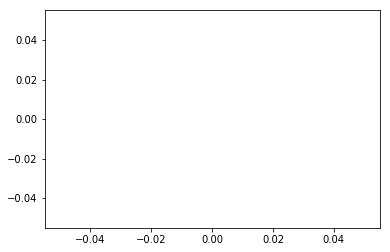

In [17]:
fig, ax = plt.subplots()
plt.plot(x = data['year'], y=data['SP.POP.GROW'])

country
Czech Republic     AxesSubplot(0.125,0.125;0.775x0.755)
Slovak Republic    AxesSubplot(0.125,0.125;0.775x0.755)
World              AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

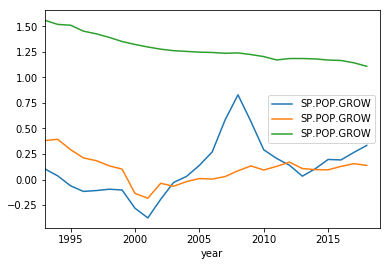

In [15]:
fig, ax = plt.subplots()
data.groupby('country').plot(x = 'year', y='SP.POP.GROW', kind = 'line', legend = True, ax = ax)

In [23]:
data[['country', 'year','SP.POP.TOTL']]

,country,year,SP.POP.TOTL
0,Czech Republic,2019,NaN
1,Czech Republic,2018,1.062993e+07
2,Czech Republic,2017,1.059444e+07
3,Czech Republic,2016,1.056633e+07
4,Czech Republic,2015,1.054606e+07
5,Czech Republic,2014,1.052535e+07
6,Czech Republic,2013,1.051427e+07
7,Czech Republic,2012,1.051078e+07
8,Czech Republic,2011,1.049609e+07
9,Czech Republic,2010,1.047441e+07
